In [1]:
#Strategy for using MACD to determine when to buy and when to sell.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [29]:
df=pd.read_csv('/content/AAPL (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.899277,111448000
1,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.581043,91062800
2,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.907207,93087200
3,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.990585,76457200
4,2019-04-05,49.112499,49.275002,48.982498,49.250000,48.311844,74106400
...,...,...,...,...,...,...,...
102,2019-08-26,51.465000,51.797501,51.264999,51.622501,51.027306,104174400
103,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.451519,103493200
104,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.790073,63755200
105,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.650040,83962000


In [30]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-04-01,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.899277,111448000
2019-04-02,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.581043,91062800
2019-04-03,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.907207,93087200
2019-04-04,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.990585,76457200
2019-04-05,2019-04-05,49.112499,49.275002,48.982498,49.250000,48.311844,74106400
...,...,...,...,...,...,...,...
2019-08-26,2019-08-26,51.465000,51.797501,51.264999,51.622501,51.027306,104174400
2019-08-27,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.451519,103493200
2019-08-28,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.790073,63755200
2019-08-29,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.650040,83962000


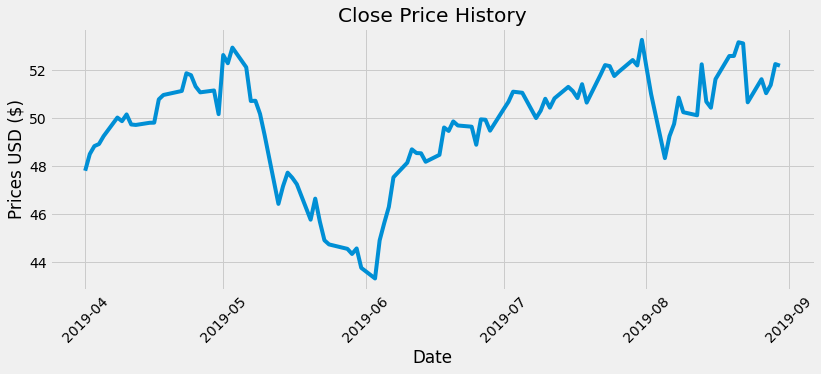

In [31]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Prices USD ($)')
plt.show()

In [33]:
#short ema
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#long ema
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#MACD line
MACD=ShortEMA-LongEMA
#signal line
signal=MACD.ewm(span=9,adjust=False).mean()


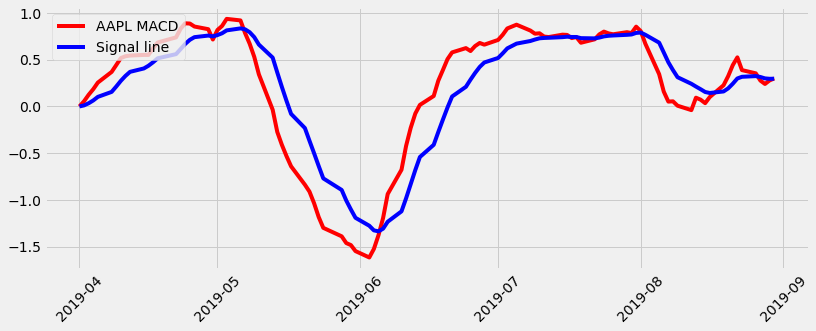

In [34]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='AAPL MACD',color='red')
plt.plot(df.index,signal,label='Signal line',color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [35]:
df['MACD']=MACD
df['Signal Line']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-04-01,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.899277,111448000,0.000000,0.000000
2019-04-02,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.581043,91062800,0.055442,0.011088
2019-04-03,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.907207,93087200,0.124771,0.033825
2019-04-04,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.990585,76457200,0.184448,0.063950
2019-04-05,2019-04-05,49.112499,49.275002,48.982498,49.250000,48.311844,74106400,0.255227,0.102205
...,...,...,...,...,...,...,...,...,...
2019-08-26,2019-08-26,51.465000,51.797501,51.264999,51.622501,51.027306,104174400,0.354440,0.324683
2019-08-27,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.451519,103493200,0.276931,0.315133
2019-08-28,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.790073,63755200,0.240370,0.300180
2019-08-29,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.650040,83962000,0.278388,0.295822


In [47]:
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
    else: 
        Buy.append(np.nan)    
        Sell.append(np.nan)

  return(Buy,Sell)

In [51]:
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

In [52]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Prica,Sell_Signal_Price
2019-04-01,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.899277,111448000,0.000000,0.000000,NaN,NaN,NaN
2019-04-02,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.581043,91062800,0.055442,0.011088,48.505001,NaN,NaN
2019-04-03,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.907207,93087200,0.124771,0.033825,NaN,NaN,NaN
2019-04-04,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.990585,76457200,0.184448,0.063950,NaN,NaN,NaN
2019-04-05,2019-04-05,49.112499,49.275002,48.982498,49.250000,48.311844,74106400,0.255227,0.102205,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-26,2019-08-26,51.465000,51.797501,51.264999,51.622501,51.027306,104174400,0.354440,0.324683,NaN,NaN,NaN
2019-08-27,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.451519,103493200,0.276931,0.315133,NaN,51.040001,51.040001
2019-08-28,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.790073,63755200,0.240370,0.300180,NaN,NaN,NaN
2019-08-29,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.650040,83962000,0.278388,0.295822,NaN,NaN,NaN


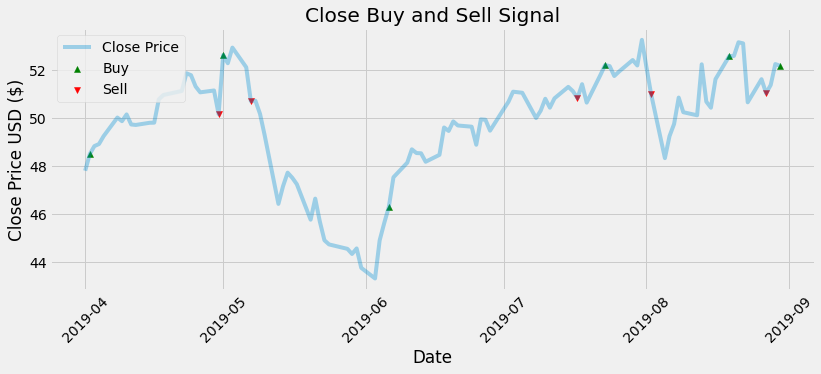

In [53]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Buy and Sell Signal')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()